In [209]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [210]:
def cplx2db(number):
    return 20*np.log10(np.abs(number))

def lowpass_design(freq: float, q: float) -> tuple:
    tau = np.tan(freq/2)
    f = 2*tau
    b, a = [f**2], [1, 2*f/q, f**2]
    b, a = sig.bilinear(b, a)
    b[0] = tau**2
    b[1] = 2*tau**2
    b[2] = tau**2
    a[0] = 1 + 2*(tau/q) + tau**2
    a[1] = 2*tau**2 - 2
    a[2] = 1 - 2*(tau/q) + tau**2
    b = b/a[0]
    a = a/a[0]
    print(b, a)
    return b, a

def pole_zero_plot(b, a):
    _, ax = plt.subplots()
    zeros = np.roots(b)
    poles = np.roots(a)
    print(f'{zeros=}')
    print(f'{poles=}')
    ax.scatter(np.real(zeros), np.imag(zeros), marker='o')
    ax.scatter(np.real(poles), np.imag(poles), marker='x')
    ax.grid()
    circle = plt.Circle((0, 0), 1, fill=False)
    ax.add_patch(circle)
    ax.set_aspect('equal')
    return ax

[0.01246091 0.02492182 0.01246091] [ 1.         -1.55348621  0.60332985]
[0.01550543 0.03101086 0.01550543] [ 1.         -1.93304242  0.99506413]
[0.01553994 0.03107989 0.01553994] [ 1.         -1.93734554  0.99950531]
[0.12481807 0.24963613 0.12481807] [ 1.         -0.58681599  0.08608825]
[0.22793087 0.45586175 0.22793087] [ 1.         -1.07158751  0.98331101]
[0.2296556 0.4593112 0.2296556] [ 1.         -1.07969608  0.99831847]


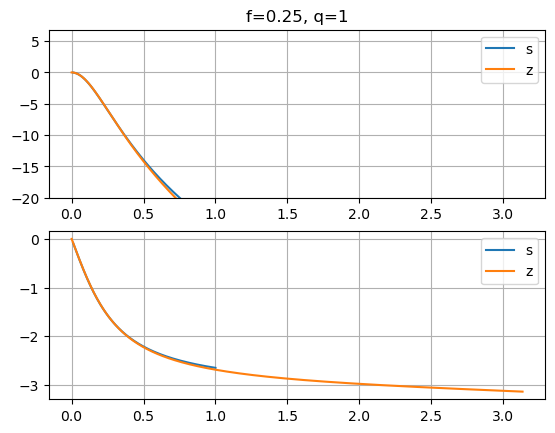

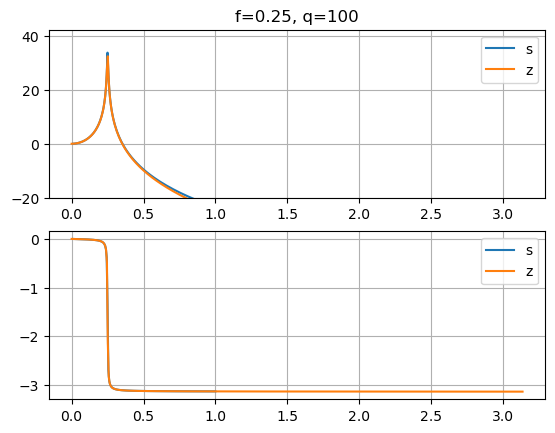

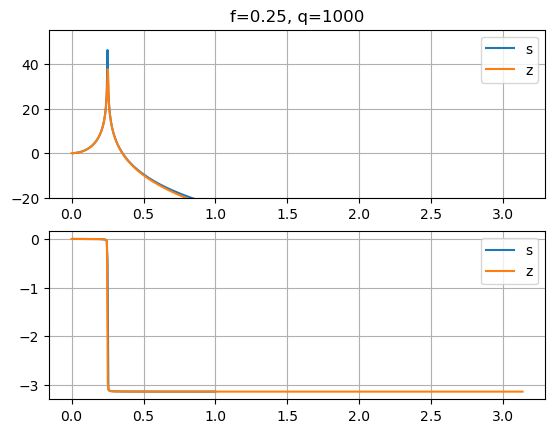

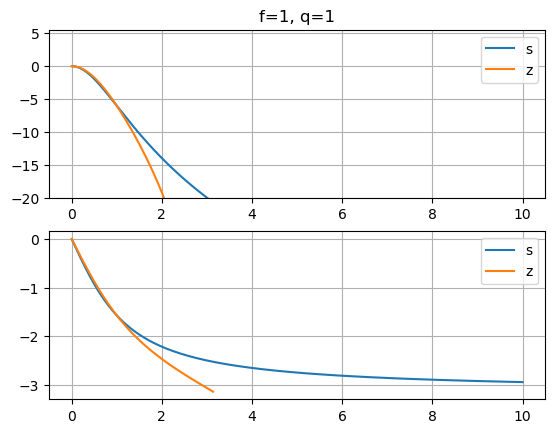

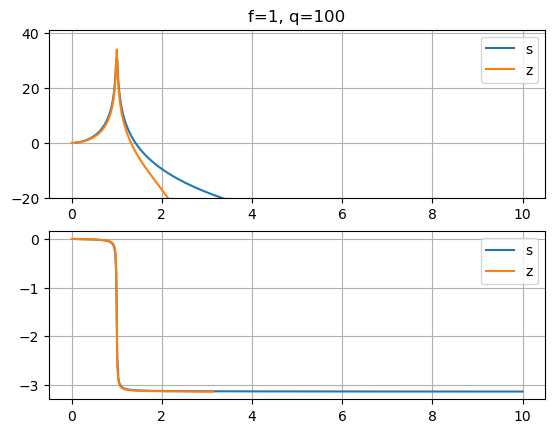

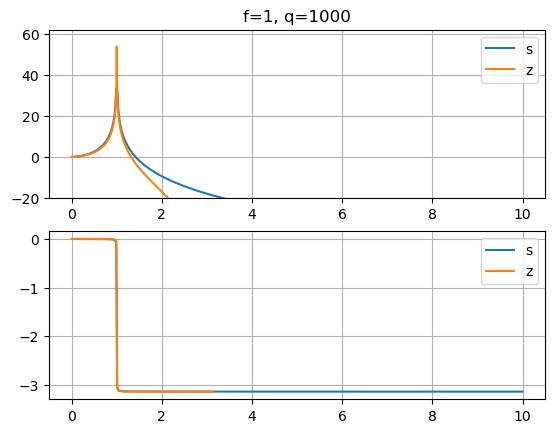

In [211]:
for f in [0.25, 1]:
    for q in [1, 100, 1000]:
        b, a = [f**2], [1, 2*f/q, f**2]
        ws, hs = sig.freqs(b, a)
        b, a = lowpass_design(f, q)
        wz, hz = sig.freqz(b, a)
        _, ax = plt.subplots(2, 1)
        ax[0].plot(ws, cplx2db(hs), label='s')
        ax[0].plot(wz, cplx2db(hz), label='z')
        ax[1].plot(ws, np.angle(hs), label='s')
        ax[1].plot(wz, np.angle(hz), label='z')
        ax[0].legend()
        ax[1].legend()
        ax[0].grid(True)
        ax[1].grid(True)
        ax[0].set_title(f'{f=}, {q=}')
        ax[0].set_ylim(-20)

